In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [3]:
df = pd.read_csv('titanic.csv')

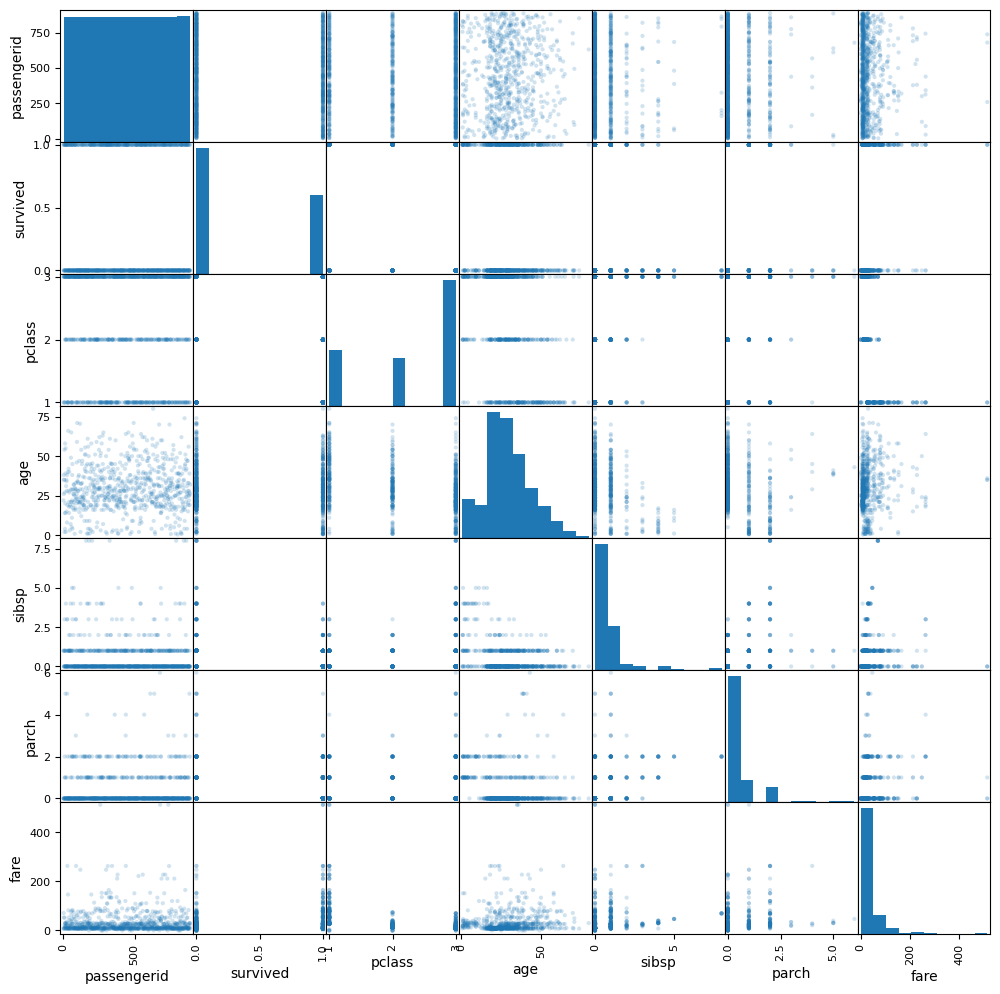

In [5]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(12, 12))
plt.show()

In [6]:
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [7]:
df['age'].fillna(-999, inplace=True)

/tmp/ipykernel_9889/937198606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(-999, inplace=True)


In [13]:
df = pd.get_dummies(df)

In [14]:
selected_features = ['pclass', 'sex_male', 'age', 'sibsp', 'parch', 'fare'] 



In [15]:
X = df[selected_features]
y = df['survived']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Length of our Training data:', len(X_train), '\nLength of our Testing data:', len(X_test))

Length of our Training data: 712 
Length of our Testing data: 179


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [17]:
model = DecisionTreeClassifier(max_depth=2)

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [21]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

y_pred_proba = model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.765363
Precision Score: 0.900000
Recall Score: 0.486486
F1 Score: 0.631579
AUC Score: 0.847362


# Visualize your tree

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch or RandomizedSearch

### For assistance on this, look at Steves TA Tips code in `TA-Tips/random_forest_tuning.ipynb`


1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [24]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [25]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, scoring='accuracy', cv=5)

In [26]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [27]:
print("Best Parameters:", grid_search_cv.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}


In [28]:
model = grid_search_cv.best_estimator_
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.765363
Precision Score: 0.735294
Recall Score: 0.675676
F1 Score: 0.704225
AUC Score: 0.816860


In [29]:
feature_imp = pd.DataFrame.from_dict({'feature_importance': model.feature_importances_, 'feature': selected_features}).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
1,0.334325,sex_male
5,0.228103,fare
2,0.214256,age
0,0.139387,pclass
4,0.055386,parch
3,0.028542,sibsp


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [30]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [32]:
from sklearn.ensemble import RandomForestClassifier
rid_search_cv = GridSearchCV(RandomForestClassifier(), params, scoring='f1', cv=5)

In [33]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [34]:
print("Best Parameters:", grid_search_cv.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}


In [35]:
model = grid_search_cv.best_estimator_

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)

y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score: %f" % auc)

Accuracy Score: 0.776536
Precision Score: 0.757576
Recall Score: 0.675676
F1 Score: 0.714286
AUC Score: 0.802188


In [36]:
feature_imp = pd.Series(model.feature_importances_, index=selected_features).sort_values(ascending=False)
feature_imp

sex_male    0.334325
fare        0.235354
age         0.207267
pclass      0.131335
parch       0.061610
sibsp       0.030108
dtype: float64

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [37]:
df = pd.read_csv('ny-vs-sf-houses.csv')
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [ ]:
X = df.drop(columns=['in_sf'])
y = df['in_sf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Most important feature:", feature_importances.idxmax())
feature_importan

# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [ ]:
df = pd.read_csv('data/adult_income.csv')
df.head()